In [1]:
%run Preprocessing.py

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
#read the data
df = pd.read_csv('austin_weather.csv')
X_train, X_test, y_train, y_test, X_val, y_val = preprocess(df)

In [3]:
#import pca library
from sklearn.decomposition import PCA
#instantiate pca
pca = PCA(n_components=7)
#fit pca
pca.fit(X_train)
#transform data
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_val)
#check shape
np.sum(pca.explained_variance_ratio_)


0.9352241781499981

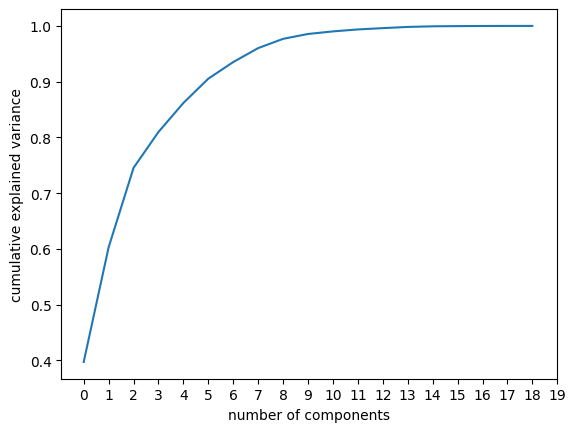

In [4]:
# plot cumulative pca variance ratio for 10 components
pca = PCA(n_components=19)
pca.fit(X_train)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xticks(np.arange(0, 20, step=1))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [5]:
#instantiate pca
pca = PCA(n_components=7)
#fit pca
pca.fit(X_train)
#transform data
X_train = pca.transform(X_train)
X_val = pca.transform(X_val)

In [6]:
# We will train for Rain first
y_train_rain = y_train["Rain"]
y_val_rain = y_val["Rain"]

In [7]:
# Lets try Logistic Regression, KNN, Random Forest, and SVM, and see which one performs the best
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

logmodel_rain = LogisticRegression()
knnmodel_rain = KNeighborsClassifier()
rfmodel_rain = RandomForestClassifier()
svmmodel_rain = SVC()

logmodel_rain.fit(X_train, y_train_rain)
knnmodel_rain.fit(X_train, y_train_rain)
rfmodel_rain.fit(X_train, y_train_rain)
svmmodel_rain.fit(X_train, y_train_rain)

SVC()

In [8]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

def get_metrics(model, X, y):
    y_pred = model.predict(X)
    from sklearn.metrics import classification_report
    class_rep = classification_report(y, model.predict(X))
    class_rep = class_rep.split()
    weighted_avg = class_rep[-5:]

    from sklearn.metrics import accuracy_score
    acc = accuracy_score(y, model.predict(X_val))
    return acc,weighted_avg[1], weighted_avg[2], weighted_avg[3]

In [9]:
rain_logmodel_metrics = get_metrics(logmodel_rain, X_val, y_val_rain)
rain_knnmodel_metrics = get_metrics(knnmodel_rain, X_val, y_val_rain)
rain_rfmodel_metrics = get_metrics(rfmodel_rain, X_val, y_val_rain)
rain_svmmodel_metrics = get_metrics(svmmodel_rain, X_val, y_val_rain)

# Create a dataframe to store the metrics
rain_metrics = pd.DataFrame(columns=["Model", "Accuracy", "Precision", "Recall", "F1"])

# Add the metrics to the dataframe

rain_metrics = rain_metrics.append({"Model": "Logistic Regression", "Accuracy": rain_logmodel_metrics[0], "Precision": rain_logmodel_metrics[1], "Recall": rain_logmodel_metrics[2], "F1": rain_logmodel_metrics[3]}, ignore_index=True)
rain_metrics = rain_metrics.append({"Model": "KNN", "Accuracy": rain_knnmodel_metrics[0], "Precision": rain_knnmodel_metrics[1], "Recall": rain_knnmodel_metrics[2], "F1": rain_knnmodel_metrics[3]}, ignore_index=True)
rain_metrics = rain_metrics.append({"Model": "Random Forest", "Accuracy": rain_rfmodel_metrics[0], "Precision": rain_rfmodel_metrics[1], "Recall": rain_rfmodel_metrics[2], "F1": rain_rfmodel_metrics[3]}, ignore_index=True)
rain_metrics = rain_metrics.append({"Model": "SVM", "Accuracy": rain_svmmodel_metrics[0], "Precision": rain_svmmodel_metrics[1], "Recall": rain_svmmodel_metrics[2], "F1": rain_svmmodel_metrics[3]}, ignore_index=True)

rain_metrics

/tmp/ipykernel_22801/3076027885.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  rain_metrics = rain_metrics.append({"Model": "Logistic Regression", "Accuracy": rain_logmodel_metrics[0], "Precision": rain_logmodel_metrics[1], "Recall": rain_logmodel_metrics[2], "F1": rain_logmodel_metrics[3]}, ignore_index=True)
/tmp/ipykernel_22801/3076027885.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  rain_metrics = rain_metrics.append({"Model": "KNN", "Accuracy": rain_knnmodel_metrics[0], "Precision": rain_knnmodel_metrics[1], "Recall": rain_knnmodel_metrics[2], "F1": rain_knnmodel_metrics[3]}, ignore_index=True)
/tmp/ipykernel_22801/3076027885.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  rain_metrics = rain_metrics.

,Model,Accuracy,Precision,Recall,F1
0,Logistic Regression,0.848485,0.85,0.85,0.84
1,KNN,0.848485,0.85,0.85,0.84
2,Random Forest,0.873737,0.87,0.87,0.87
3,SVM,0.863636,0.87,0.86,0.85


In [10]:
y_train_fog = y_train["Fog"]
y_val_fog = y_val["Fog"]

logmodel_fog = LogisticRegression()
knnmodel_fog = KNeighborsClassifier()
rfmodel_fog = RandomForestClassifier()
svmmodel_fog = SVC()

logmodel_fog.fit(X_train, y_train_fog)
knnmodel_fog.fit(X_train, y_train_fog)
rfmodel_fog.fit(X_train, y_train_fog)
svmmodel_fog.fit(X_train, y_train_fog)

SVC()

In [11]:
fog_logmodel_metrics = get_metrics(logmodel_fog, X_val, y_val_fog)
fog_knnmodel_metrics = get_metrics(knnmodel_fog, X_val, y_val_fog)
fog_rfmodel_metrics = get_metrics(rfmodel_fog, X_val, y_val_fog)
fog_svmmodel_metrics = get_metrics(svmmodel_fog, X_val, y_val_fog)

fog_metrics = pd.DataFrame(columns=["Model", "Accuracy", "Precision", "Recall", "F1"])

fog_metrics = fog_metrics.append({"Model": "Logistic Regression", "Accuracy": fog_logmodel_metrics[0], "Precision": fog_logmodel_metrics[1], "Recall": fog_logmodel_metrics[2], "F1": fog_logmodel_metrics[3]}, ignore_index=True)
fog_metrics = fog_metrics.append({"Model": "KNN", "Accuracy": fog_knnmodel_metrics[0], "Precision": fog_knnmodel_metrics[1], "Recall": fog_knnmodel_metrics[2], "F1": fog_knnmodel_metrics[3]}, ignore_index=True)
fog_metrics = fog_metrics.append({"Model": "Random Forest", "Accuracy": fog_rfmodel_metrics[0], "Precision": fog_rfmodel_metrics[1], "Recall": fog_rfmodel_metrics[2], "F1": fog_rfmodel_metrics[3]}, ignore_index=True)
fog_metrics = fog_metrics.append({"Model": "SVM", "Accuracy": fog_svmmodel_metrics[0], "Precision": fog_svmmodel_metrics[1], "Recall": fog_svmmodel_metrics[2], "F1": fog_svmmodel_metrics[3]}, ignore_index=True)

fog_metrics

/tmp/ipykernel_22801/3163063769.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fog_metrics = fog_metrics.append({"Model": "Logistic Regression", "Accuracy": fog_logmodel_metrics[0], "Precision": fog_logmodel_metrics[1], "Recall": fog_logmodel_metrics[2], "F1": fog_logmodel_metrics[3]}, ignore_index=True)
/tmp/ipykernel_22801/3163063769.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fog_metrics = fog_metrics.append({"Model": "KNN", "Accuracy": fog_knnmodel_metrics[0], "Precision": fog_knnmodel_metrics[1], "Recall": fog_knnmodel_metrics[2], "F1": fog_knnmodel_metrics[3]}, ignore_index=True)
/tmp/ipykernel_22801/3163063769.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fog_metrics = fog_metrics.append({"Model":

,Model,Accuracy,Precision,Recall,F1
0,Logistic Regression,0.949495,0.94,0.95,0.94
1,KNN,0.949495,0.94,0.95,0.94
2,Random Forest,0.949495,0.94,0.95,0.94
3,SVM,0.944444,0.95,0.94,0.92


In [12]:
y_train_thunderstorm = y_train["Thunderstorm"]
y_val_thunderstorm = y_val["Thunderstorm"]

logmodel_rain_thunderstorm = LogisticRegression()
knnmodel_thunderstorm = KNeighborsClassifier()
rfmodel_thunderstorm = RandomForestClassifier()
svmmodel_thunderstorm = SVC()

logmodel_rain_thunderstorm.fit(X_train, y_train_thunderstorm)
knnmodel_thunderstorm.fit(X_train, y_train_thunderstorm)
rfmodel_thunderstorm.fit(X_train, y_train_thunderstorm)
svmmodel_thunderstorm.fit(X_train, y_train_thunderstorm)

SVC()

In [13]:

thunderstorm_logmodel_metrics = get_metrics(logmodel_rain_thunderstorm, X_val, y_val_thunderstorm)
thunderstorm_knnmodel_metrics = get_metrics(knnmodel_thunderstorm, X_val, y_val_thunderstorm)
thunderstorm_rfmodel_metrics = get_metrics(rfmodel_thunderstorm, X_val, y_val_thunderstorm)
thunderstorm_svmmodel_metrics = get_metrics(svmmodel_thunderstorm, X_val, y_val_thunderstorm)


thunderstorm_metrics = pd.DataFrame(columns=["Model", "Accuracy", "Precision", "Recall", "F1"])

thunderstorm_metrics = thunderstorm_metrics.append({"Model": "Logistic Regression", "Accuracy": thunderstorm_logmodel_metrics[0], "Precision": thunderstorm_logmodel_metrics[1], "Recall": thunderstorm_logmodel_metrics[2], "F1": thunderstorm_logmodel_metrics[3]}, ignore_index=True)
thunderstorm_metrics = thunderstorm_metrics.append({"Model": "KNN", "Accuracy": thunderstorm_knnmodel_metrics[0], "Precision": thunderstorm_knnmodel_metrics[1], "Recall": thunderstorm_knnmodel_metrics[2], "F1": thunderstorm_knnmodel_metrics[3]}, ignore_index=True)
thunderstorm_metrics = thunderstorm_metrics.append({"Model": "Random Forest", "Accuracy": thunderstorm_rfmodel_metrics[0], "Precision": thunderstorm_rfmodel_metrics[1], "Recall": thunderstorm_rfmodel_metrics[2], "F1": thunderstorm_rfmodel_metrics[3]}, ignore_index=True)
thunderstorm_metrics = thunderstorm_metrics.append({"Model": "SVM", "Accuracy": thunderstorm_svmmodel_metrics[0], "Precision": thunderstorm_svmmodel_metrics[1], "Recall": thunderstorm_svmmodel_metrics[2], "F1": thunderstorm_svmmodel_metrics[3]}, ignore_index=True)

thunderstorm_metrics

/tmp/ipykernel_22801/629684406.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  thunderstorm_metrics = thunderstorm_metrics.append({"Model": "Logistic Regression", "Accuracy": thunderstorm_logmodel_metrics[0], "Precision": thunderstorm_logmodel_metrics[1], "Recall": thunderstorm_logmodel_metrics[2], "F1": thunderstorm_logmodel_metrics[3]}, ignore_index=True)
/tmp/ipykernel_22801/629684406.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  thunderstorm_metrics = thunderstorm_metrics.append({"Model": "KNN", "Accuracy": thunderstorm_knnmodel_metrics[0], "Precision": thunderstorm_knnmodel_metrics[1], "Recall": thunderstorm_knnmodel_metrics[2], "F1": thunderstorm_knnmodel_metrics[3]}, ignore_index=True)
/tmp/ipykernel_22801/629684406.py:11: FutureWarning: The frame.append method is deprecated and will be remove

,Model,Accuracy,Precision,Recall,F1
0,Logistic Regression,0.873737,0.86,0.87,0.85
1,KNN,0.883838,0.88,0.88,0.87
2,Random Forest,0.873737,0.86,0.87,0.85
3,SVM,0.883838,0.88,0.88,0.86
